# 911 Calls Capstone Project

Im this project I am analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sb
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

**Here I check the info of the df using info() method**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Here I am checking the first 3 rows of the dataframe using the .head() method**

In [6]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

In this section I answer a couple of basic questions

**1. What are the top 5 zipcodes for 911 calls?**

In [7]:
a = df['zip'].value_counts()
a.head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**2. What are the top 5 townships (twp) for 911 calls?**

In [8]:
b = df['twp'].value_counts()
b.head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**3. How many unique title codes are in the title column?**

In [9]:
df['title'].nunique()

110

## Creating new features
In this section I use a little bit of code to mold the data.

**I use .apply() with a custom lambda expression to create a new column called "department" that extracts the string value in the 'title' column that indicates the department the call dispatcher sends the call.** 

In [10]:
def dep_col(column):
    dep = []
    for item in column:
        rsn = item.split(':')
        dep.append(rsn[0])
    return dep

In [11]:
df['department'] = dep_col(df['title'])

In [12]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


**4. What is the most used department for a 911 call based off of this new column?**

In [13]:
c = df['department'].value_counts()
c.head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: department, dtype: int64

**Here I use seaborn to create a countplot of 911 calls by department.**

<Axes: xlabel='department', ylabel='count'>

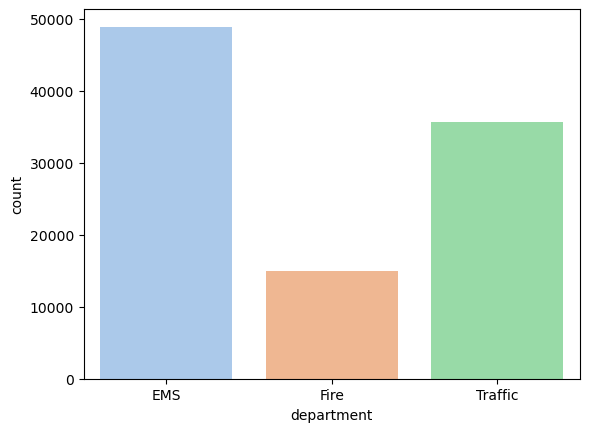

In [14]:
sb.countplot(x=df['department'],palette='pastel')

**Here I work with date/time datatypes.**

First I check what is the default datatype for the 'timestamp' column.

In [15]:
type(df.loc[0,'timeStamp'])

str

Since the data is in _string (str)_ format, I then convert the column to _datetime_

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Here it is visible that the 'timeStamp' column is now properly formated.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         86637 non-null  float64       
 4   title       99492 non-null  object        
 5   timeStamp   99492 non-null  datetime64[ns]
 6   twp         99449 non-null  object        
 7   addr        98973 non-null  object        
 8   e           99492 non-null  int64         
 9   department  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


**I can now grab specific attributes from a Datetime object by calling them**

I can use Jupyter's tab method to explore various attributes. 

Here I use .apply() to create 3 new columns called 'Hour', 'Month', and 'Day of Week' columns based off of the timeStamp column.

In [18]:
df['Hour'], df['Month'], df['Day of Week'] = df['timeStamp'].apply(lambda x: x.hour), df['timeStamp'].apply(lambda x: x.month), df['timeStamp'].apply(lambda x: x.strftime('%a'))


In [19]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


**Now I use seaborn to create a countplot of the Day of Week column with the hue based off of the 'department column.**

In [20]:
sb.set_style('whitegrid')

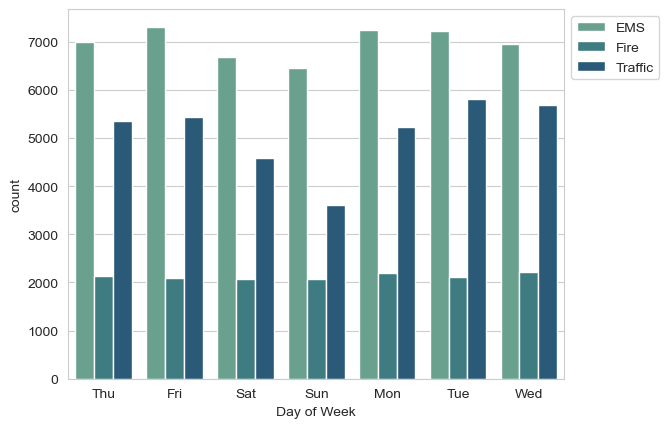

In [21]:
c = sb.countplot(x=df['Day of Week'],hue=df['department'],palette='crest')
c.legend(loc='upper left',bbox_to_anchor=(1,1))


**Now I do the same for Month:**

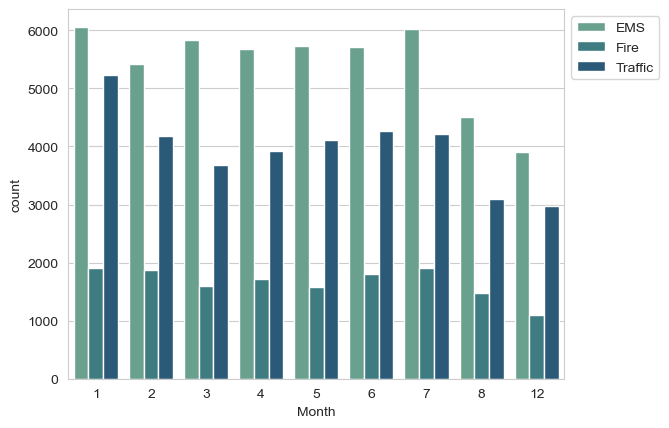

In [22]:
d = sb.countplot(x=df['Month'],hue=df['department'],palette='crest').legend(loc='upper left',bbox_to_anchor=(1,1))


There are some months missing

_____

I fill in this information by plotting the information in another way, To do this is did some work with pandas

**First I create a _gropuby_ object called 'byMonth', where I group the DataFrame by the 'month' column and use the count() method for aggregation. Then I use the .head() method on this returned DataFrame.**

In [23]:
e = df.groupby(by='Month').count()
e.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now I create a simple plot off of the dataframe indicating the count of calls per month.** 

(1.0, 12.0)

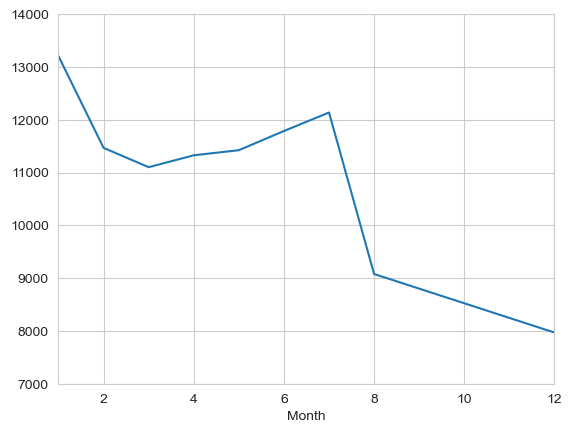

In [24]:
plt_e = e.plot(kind='line',y='Hour',legend=False)
plt_e.set_ylim(7000,14000)
plt_e.set_xlim(1,12)

I use the 'Hour' column for the 'y' parameter just to use the values for the .count() method. Keep in mind that the month indicator is the index of the .count() table.

**Now I use seaborn's lmplot() to attempt to create a linear fit on the number of calls per month. I also reset the index to the 'Month' column.**

In [25]:
e['Month']=e.index

In [26]:
import matplotlib.pyplot as plt

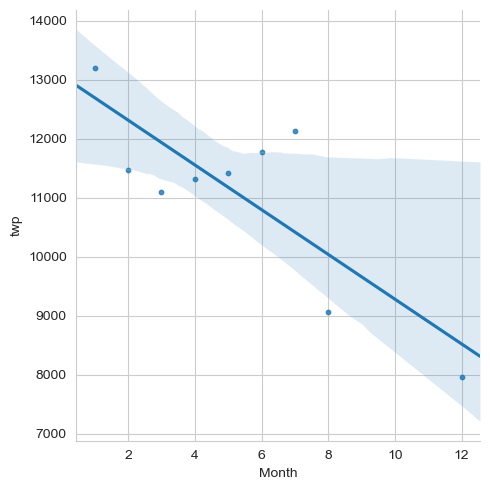

In [27]:
plt_e2 = sb.lmplot(data=e,x='Month',y='twp',scatter_kws={'s':10},truncate=False)


Since there is major uncertainty in the area of the missing months, the prediction is inaccurate.

**Here I create a new column called 'Date' that contains the date from the timeStamp column** 

In [28]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


**Here I groupby the recently created 'Date' column with the .count() aggregate method and create a plot of counts of 911 calls.**

In [29]:
ttl = df.groupby(by='Date').count()

(16779.0, 17037.0)

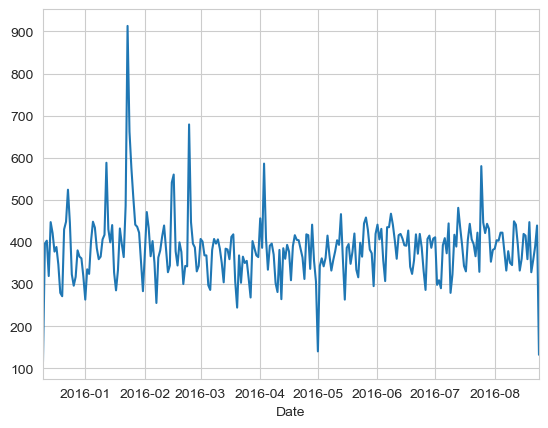

In [30]:
ttl.plot(kind='line',y='e',legend=False)
plt.xlim(ttl.index.min(),ttl.index.max())

**Here I recreate the plot abovem, but I create 3 separate plots with each plot representing a 'department' for the 911 call**

In [31]:
ttl_1 = df[df['department']=='Traffic'].groupby(by='Date').count()


(0.0, 600.0)

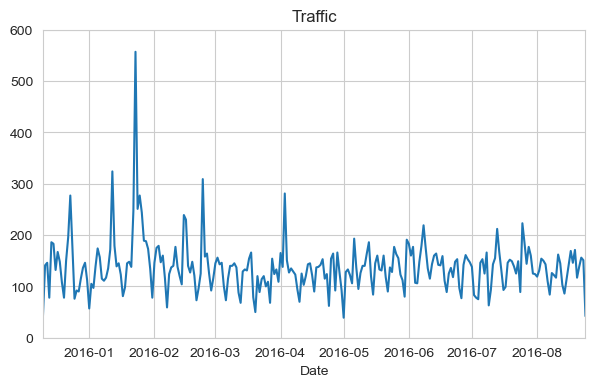

In [32]:
ttl_1.plot(kind='line',y='e',legend=False,title='Traffic',figsize=(7,4))
plt.xlim(ttl_1.index.min(),ttl_1.index.max())
plt.ylim(0,600)

In [33]:
ttl_2 = df[df['department']=='Fire'].groupby(by='Date').count()


(0.0, 180.0)

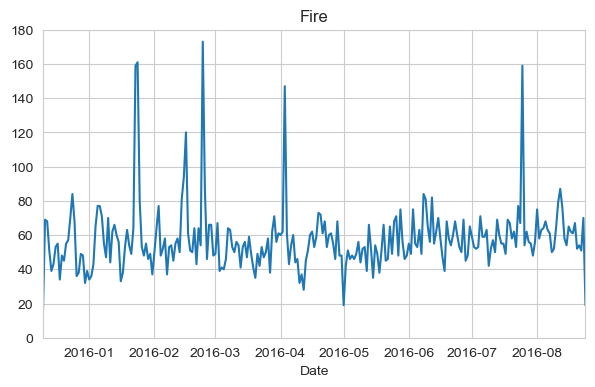

In [34]:
ttl_2.plot(kind='line',y='e',legend=False,title='Fire',figsize=(7,4))
plt.xlim(ttl_2.index.min(),ttl_2.index.max())
plt.ylim(0,180)

In [35]:
ttl_3 = df[df['department']=='EMS'].groupby(by='Date').count()


(50.0, 250.0)

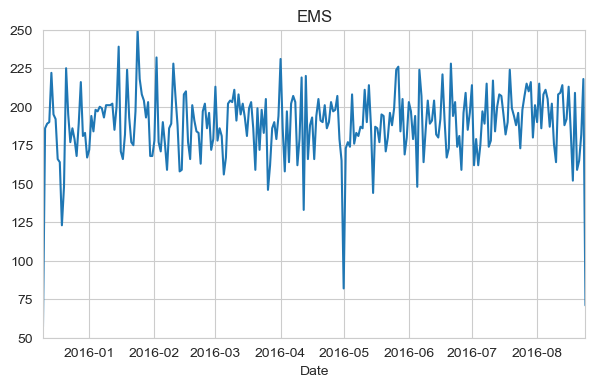

In [36]:
ttl_3.plot(kind='line',y='e',legend=False,title='EMS',figsize=(7,4))
plt.xlim(ttl_3.index.min(),ttl_3.index.max())
plt.ylim(50,250)

These type of charts are useful to set the ground for time series analysis, and visualizing trends and patterns over time.
____
**Now I create heatmaps with seaborn. I first restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [37]:
df_1 = df[['Day of Week','Hour','e']]
df_1

,Day of Week,Hour,e
0,Thu,17,1
1,Thu,17,1
2,Thu,17,1
3,Thu,17,1
4,Thu,17,1
...,...,...,...
99487,Wed,11,1
99488,Wed,11,1
99489,Wed,11,1
99490,Wed,11,1


In [38]:
f = df_1.groupby(['Day of Week','Hour']).count()
f

e
Day of Week Hour     
Fri         0     275
            1     235
            2     191
            3     175
            4     201
...               ...
Wed         19    686
            20    668
            21    575
            22    490
            23    335

[168 rows x 1 columns]

In [39]:
g = f.unstack(-1)
h = g['e']
h.head(5)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Here I create a HeatMap using this new DataFrame.**

In [40]:
#hr_1 = df['Hour'].unique().sort()
hr_1 = df['Hour'].unique()
hr_1.sort()
hr_2 = hr_1.tolist()

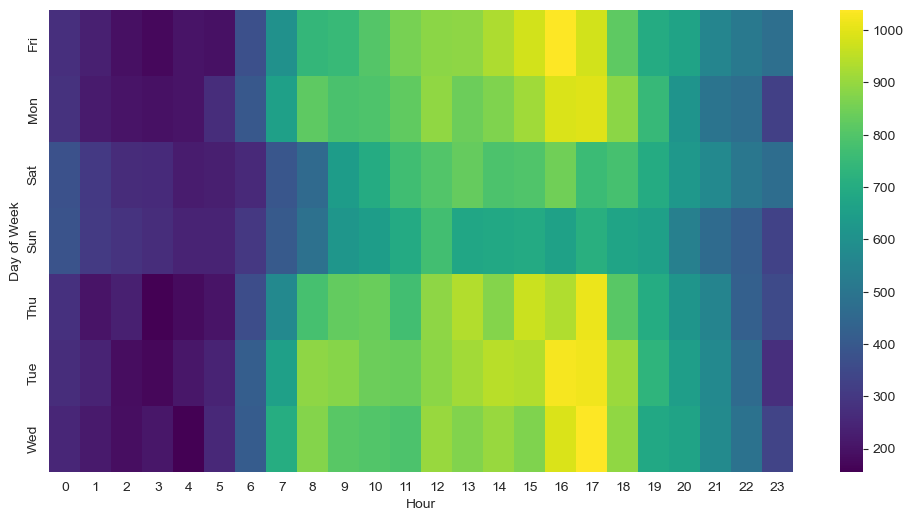

In [41]:
plt.figure(figsize=(12,6))
i = sb.heatmap(h,cmap="viridis",annot=False)
#i.set(xlabel='Hour')


**Here I create a clustermap using the same DataFrame**

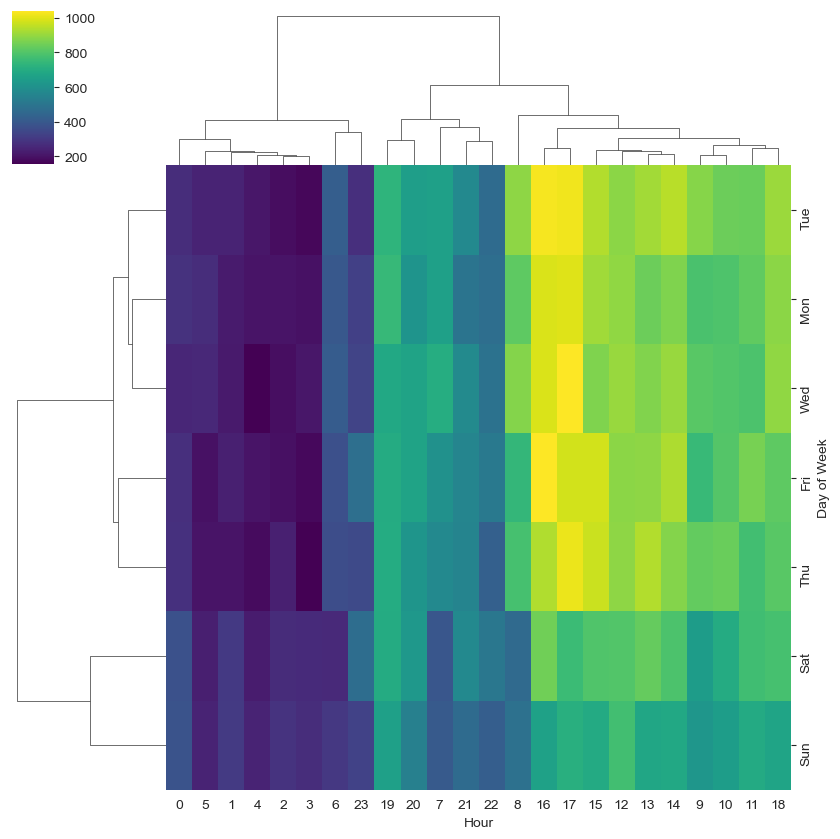

In [42]:
j = sb.clustermap(h,cmap="viridis",figsize=(8.5,8.5))
#j.set(xlabel='Hour')

**Here I replicate the same plots and operations, for a DataFrame that shows the Month as the column**

In [43]:
f1 = df.groupby(['Day of Week','Month']).count()
g1 = f1.unstack(-1)
h1 = g1['e']
h1.head(5)

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [44]:
mo_1 = df['Month'].unique()
mo_1.sort()
mo_2 = mo_1.tolist()
mo_2

[1, 2, 3, 4, 5, 6, 7, 8, 12]

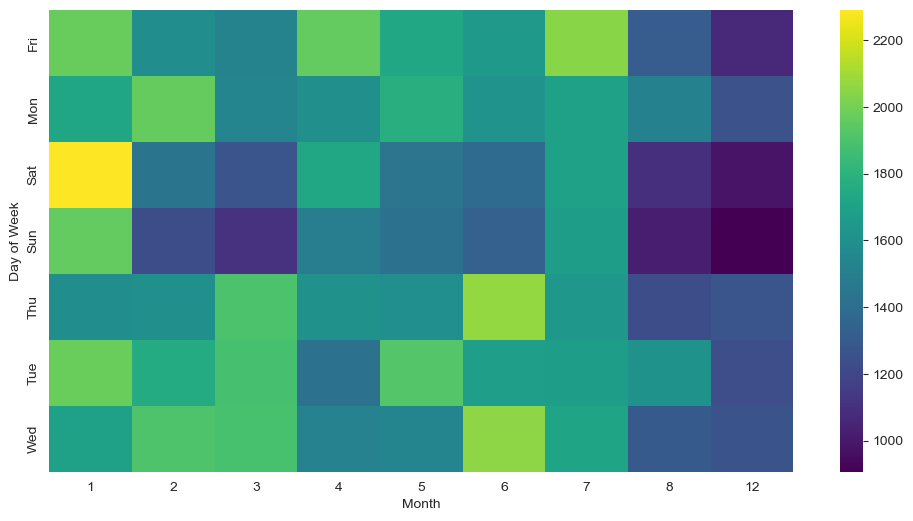

In [45]:
plt.figure(figsize=(12,6))
i1 = sb.heatmap(h1,cmap="viridis",annot=False)
#i1.set(xlabel='Month')

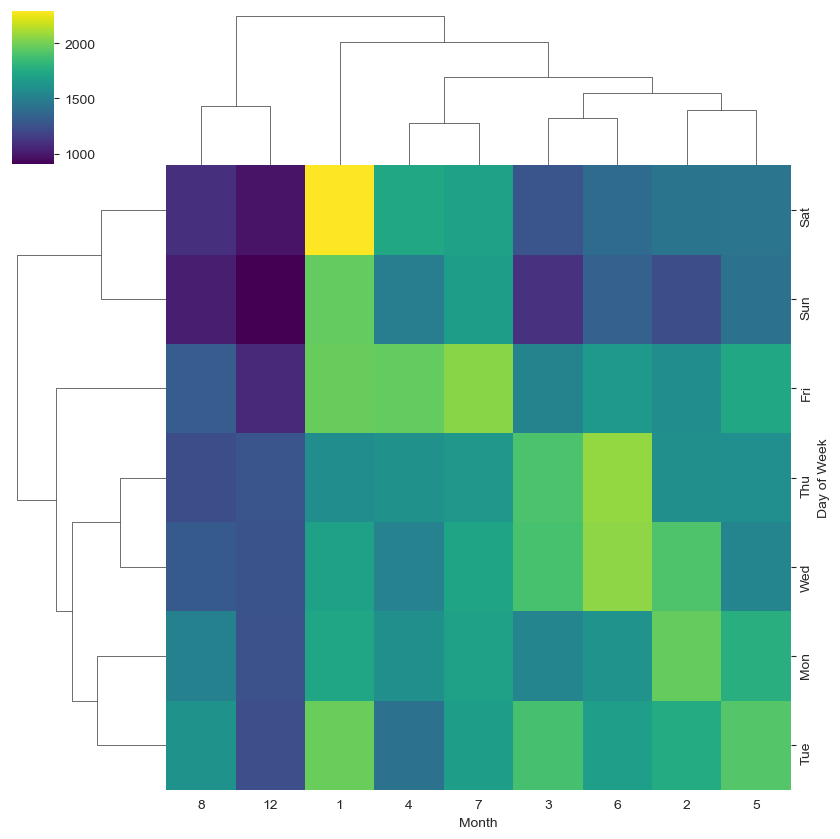

In [46]:
j1 = sb.clustermap(h1,cmap="viridis",figsize=(8.5,8.5))
#j.set(xlabel='Hour')